## ASTR 21000, Winter 2020

## Homework Assignment 4 (55 points + 15 extra-credit points)

## Drawing samples from distribution and implementing Differential Evolution minimization

### Distributed: Monday, February 24

### Due: Friday,  February 28 at 11:59pm 

#### Exercises you need to do for the assignment grade are tasks in Exercises 1, 2, and 3 along with relative difficulty of each task in the exercise denoted by associated points

#### Please submit you notebook (i.e. its *.ipynb file) as an attachment via Canvas. You can also attach other files, if needed to your submission. Make sure that all of the cells in the notebook have output that you want, when you run all cells just before the submission


#### Jupyter notebooks with class notes and assignments: https://github.com/a-kravtsov/a211w20

#### Slack workspace for this class: https://a211w20.slack.com


import packages needed by the codes below. Run this cell first before using these codes. 

In [1]:
import numpy as np
import timeit

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
plot_pretty(fontsize=12)

### Exercise 1 (10 points): drawing pseudo-random integers and Gaussian pseudo-random numbers.

**Background.** During the past weeks (as well as before) we have encountered algorithms that rely on drawing random numbers with a given distribution. Most common case is random numbers, either integer or real, that are *uniformly distributed* within a given range. Uniform distribution means that all numbers within range have equal probability to be drawn, so for example, if we randomly draw uniformly distributed integers from 0 to 10, all numbers 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 will be drawn equal number of times after sufficiently large number of draws. 

In particular, in the *random walk* and *differential evolution* algorithms i described in class on Friday (see <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook) random samples (draws) from Gaussian and uniform distribution are used.  

In particular, the differential evolution (DE) algorithm discussed on Friday and can be described by the following pseudo-code: 

    def minimize_by_differential_evolution(func, x0, atol=1.e-6, s=1.0, bounds=None)
    
        npop = np.size(x0)[0] # the number of population members
        fnow = func(xnow)
        xnow = np.copy(x0)
        xnext = np.zeros_like(xnow)
        #....
        while some convergence criterion is not met: 
            # xnow is a vector of coordinate vectors of the current population
            # xnext is a vector of coordinate vector of the next gen population
            for i in range(npop):
                # generate random indices  ir1, ir2, ir3 
                # where all indices are not equal to each other and not equal to i
                # s can be a constant for large npop, but it's more safe to make it a Gaussian random number
                xtry = xnow[ir3] + s * (xnow[ir1] - xnor[ir2])
                if xtry is within bounds and func(xtry) <= fnow[i]:
                    xnext[i] = xtry
                else:
                    xnext[i] = xnow[i]
                
        return xnext
        
As we can see, the algorithm is quite simple, but it requires generation of unique random indices ir1, ir2, ir3 different from each other and from i, as well as a random Gaussian number to be used for scaling parameter s for reasons that are described in <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook. 

In this exercise, you will learn and practice drawing such random numbers using numpy routines. In classes this week we will also learn the algorithms used in these routines.  

### What are you learning in this exercise: 

* How to draw random numbers and randomly permute number sequences using numpy routines.
* Some properties of the random draws for small sample sizes. 
* How to check the distribution of random draws using a histogram. 

**Task 1a. (3 points)** <tt>nrand</tt> random intergers distributed uniformly in the range <tt>imin</tt> to <tt>imax</tt> can be drawn using routine <a href="https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_integers.html">numpy.random.random_integers<tt></tt></a>  as

        irand = np.random.random_integers(low=imin, high=imax, size=nrand)

where <tt>irand</tt> will be a vector of randomly drawn integers in the required range. Use this function to generate <tt>nrand=10</tt>, <tt>nrand=20</tt>, <tt>nrand=30</tt> numbers in the range from 0 to <tt>nrand-1</tt> and print them out. Examine the numbers and comment on their properties: do they look random? do the numbers repeat (if so, is this ok or note)? Comment on whether this function can be used to generate indices <tt>ir1, ir2, ir3</tt> unique and different from <tt>i</tt> in the DE algorithm shown above, and, if so, how would you do this. 

Note: numpy has another routine <a href="https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html"><tt>numpy.random.randint</tt></a> to generate random integers, but this routine generates numbers excluding <tt>imax</tt>, i.e. in the semi-open interval <tt>[imin,imax)</tt>. 

The numbers appear to be generally random. There are some repeated numbers, but I would expect this kind of behavior when drawing from a truly random sample. This function could still be used to generate the indices <tt>ir1, ir2, ir3</tt> unique and different from <tt>i</tt> but I would have to remove repeated values for indices and re-draw from the remaining pool (i.e. sample without replacement) to use this function to generate the indices for the DE algorithm. 

In [5]:
minRand = 0
nrand = 10
irand10 = np.random.randint(minRand, nrand, nrand)
nrand = 20
irand20 = np.random.randint(minRand, nrand, nrand)
nrand = 30
irand30 = np.random.randint(minRand, nrand, nrand)
print("nrand=10: ",irand10)
print("nrand=20: ",irand20)
print("nrand=30: ",irand30)

nrand=10:  [6 3 7 2 1 6 3 2 7 4]
nrand=20:  [14 13 12  3  0  1 12 12  0  4  0 19 13  5  7 19  8 17 19 19]
nrand=30:  [14 12  8 28 16 20  2 21 18 11  8 18  5 25 10  3  5  4  3 23 29 25 28  4
 18 19 13 27 15 12]


**Task 1b. (2 points)** Another possibility of producing indices <tt>ir1, ir2, ir3</tt> is to take an ordered list of integer numbers from 0 to <tt>npop-1</tt> and randomly *permute* its elements using numpy function <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.permutation.html"><tt>numpy.random.permutation</tt></a>. Experiment with this function for a vector of a small size (say 10) and examine its effect on the order of the vector elements. Develop an algorithm of producing  <tt>ir1, ir2, ir3</tt> indices for the DE algorithm using this function. Do you see any advantages or disadvantages of this method over the method discussed in 1a? 

To produce the <tt>ir1, ir2, ir3</tt> indices for the DE algorithm, I am returning the first 3 values in the randomly permuted array of size <tt>npop</tt>. The advantage of this method over the one in 1a is that I am guaranteed to not have repeated values in the randomized array, so I can just directly slice off the first 3 values to use, so selecting values could be faster. 

In [6]:
def indices(npop):
    #returns ir1, ir2, ir3 indices for the DE algorithm as an array
    vec = list(range(npop))
    permute = np.random.permutation(vec)
    return permute[:3]
indices(10)

array([5, 4, 0])

**Task 1c (5 points).** Gaussian random numbers to produce stochastic scaling parameter $s$ can be drawn using routine <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html"><tt>numpy.random.normal</tt></a>. For example to produce <tt>nrnd</tt> pseudo-random draws from a Gaussian distribution with the mean <tt>mu</tt> and dispersion <tt>sigma</tt> we use

    xgauss = np.random.normal(loc=mu, scale=sigma, size=nrnd)
    
Random numbers are samples drawn from a given probability distribution function (pdf), if the probability density of the draws is described by the pdf function. Thus, we can generate a sufficiently large number of pseudo-random numbers using <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html"><tt>numpy.random.normal</tt></a>, as shown above, and then test whether they follow a Gaussian distribution. Namely, we can construct their histogram, which is the density of samples per histogram bins, and check whether the histogram is described by the Gaussian distribution: 

$$p_{\rm G}(x) =\frac{1}{\sqrt{2\pi}\sigma}\, \exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right].$$

Choose the number of bins that should be appropriate for such bins and estimate the required number of random draws using what you learned about histogram binning previously, and explain your choice. Generate the corresponding number of random draws, histogram them and compare with the equation for the Gaussian pdf above.

*Hint:* when doing this test, use the option <tt>density=True</tt> for the pyplot's <tt>hist</tt> function, so that the area under the histogram is 1.0, as it should be for a pdf. For example, for the above Gaussian pdf equation:

$$\int\limits_{-\infty}^\infty p_{\rm G}(x)dx = 1.$$

Optimization terminated successfully.
         Current function value: -178.500793
         Iterations: 15
         Function evaluations: 43


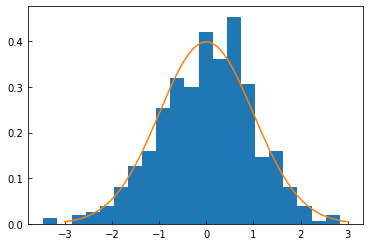

In [4]:
from codes.histtools import knuth_bin_width
from scipy.stats import norm 

#Model X~Norm(0,1)
mu = 0
sigma = 1
nrnd = 500
xgauss = np.random.normal(mu, sigma, nrnd)
#select bin numbers using Knuth method
h_knuth, bins_knuth = knuth_bin_width(xgauss, return_bins=True)
plt.hist(xgauss, bins=bins_knuth, density=True)

xrange=np.arange(-3,3,0.001)
plt.plot(xrange, norm.pdf(xrange,0,1))

### Exercise 2 (20 points): drawing pseudo-random numbers following a given distribution.

**Background: the inverse transform method.** There is a class of algorithms to generate random numbers drawn from a given distribution function. All of these algorithms are based on the algorithm to generate uniformly distributed random numbers that is described in <a href="06a_prngs.ipynb"><tt>06a_prngs.ipynb</tt></a> notebook and will be discussed in class on Wednesday. 

One of the most commonly used algorithms to draw samples from a given 1-dimensional distribution $p(x)$ is called *the inverse transform method,* which uses the cumulative distribution function of the target pdf $p(x)$ normalized to 1 at some interval $[a,b]$ that we want to sample:

$$F(\xi) = \int\limits_{a}^\xi p(x) dx;\ \ \ \mathrm{where}\ \ \xi\in[a,b],\ F\in[0,1],\ \ \mathrm{and}\ \  \int\limits_a^b p(x)dx =1$$

to generate samples of $p(x)$. Namely, if $y=F(\xi)$ can be inverted either analytically or numerically so that we can easily compute $\xi$ given a value of $y=F(\xi)$, then $\xi$ will be samples of $p(x)$, if $y$ are samples of the uniform distribution defined on the interval $[0,1)$. 

See <a href="06c_distribution_sampling.ipynb"><tt>06c_distribution_sampling.ipynb</tt></a> notebook for details on the history and logic behind this method. 

### What are you learning in this exercise: 

* How to normalize a probability distribution function and compute its cumulative distribution.

* How to use the inverse transform method to draw pseudo-random samples of 1-dimensional distributions.

**Task 2a (10 points).** 
Write a routine to sample the following distribution that depends on parameter $a$: 

$$g(x)=
 \begin{cases}
            1/\sqrt{x},&\  \mathrm{for}\ \ x\in[1/a,a],\\
            0, &    \mathrm{otherwise.\ }
    \end{cases}$$
    
Note that the above distribution is *not* a pdf, because it is not normalized to 1.0 on the interval $[1/a,a]$. Thus, you should compute the normalization constant first. You should also compute the cumulative distribution function $F(x)$ for the normalized $\tilde{g}(x)$ and its inverse.   

Your routine should take as input parameter $a$ and the number of samples, $N_s$, to be generated and return a vector of $N_s$, pseudo-random numbers distributed with $g(x)$ distribution, for example:

    def gdist(nrnd = 1, a = 2.0):
        """
        function to sample distribution g(x) = 1/sqrt(x) for x in [1/a,a] and g(x)=0 otherwise.
    
        Parameters:
        -----------
        nrnd: integer (default is 1)
            number of pseudo-random draws of g(x) to generate
        a: real 
           parameter defining the range of the distribution (see above
       
        Returns: 
        --------
        a numpy real 1d vector of size nrnd
        (pseudo-random numbers distributed with g(x), as defined above 
    
    """
    
For efficiency, your routine must be written using numpy vector operations and should not use loops. 

The vector of <tt>nrnd</tt> uniformly distributed pseudo-random numbers in the interval $[0,1)$ can be generated using routine <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html"><tt>numpy.random.uniform</tt></a> as 
    
    yrnd = np.random.uniform(size=nrnd)

Note that the sampling routine you develop here will be used in the implementation of the "affine-invariant" Markov Chain Monte Carlo (MCMC) sampling method of Goodman & Weare as part of the homework 4 assignment.  This is yet another example of a simpler method problem used as an element of a more complex algorithm. 

(array([9.14040021, 3.76416481, 2.78012173, 2.44010684, 2.13609353,
        1.94408512, 1.64807216, 1.51606638, 1.58806953, 1.3040571 ,
        1.41206183, 1.34005867, 1.24405447, 1.29605675, 1.12404922,
        1.09604799, 1.13204957, 1.07204694, 0.93204081, 1.09204781]),
 array([9.71728182e-11, 2.49989055e-02, 4.99978109e-02, 7.49967163e-02,
        9.99956216e-02, 1.24994527e-01, 1.49993432e-01, 1.74992338e-01,
        1.99991243e-01, 2.24990149e-01, 2.49989054e-01, 2.74987959e-01,
        2.99986865e-01, 3.24985770e-01, 3.49984675e-01, 3.74983581e-01,
        3.99982486e-01, 4.24981392e-01, 4.49980297e-01, 4.74979202e-01,
        4.99978108e-01]),
 <a list of 20 Patch objects>)

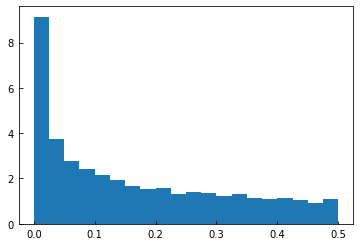

In [7]:
draws = 10000
a = 2
def gdist(nrnd=1, a=2.0):
    yrnd = np.random.uniform(0, 1, nrnd) #uniformly distributed over [0,1)
    cons = 1/(2*(a**0.5-a**(-0.5)))
    inv = (yrnd/(2*cons))**2
    return inv

#print(np.random.uniform(50))
drawY = gdist(draws,a)
plt.hist(drawY,bins=20,density=True)



**Task 2b (10 points).** Suppose we want to draw samples from a more complicated pdf, $p(x) = A x^{-\alpha}\exp[-x/b]$, for which cumulative distribution function cannot be inverted analytically. 

Design and describe strategy to use the inverse transform method in such case using techniques you have already learned in this course (3 points). Implement sampling of this function using your strategy and demonstrate that your samples follow the target distribution using histogram of the samples (i.e., test similar to that used for the Gaussian distribution in 1c above). (7 points)

When the CDF can not be inverted analytically, one method is computing the exact y values for some distribution of (a sufficiently large number of) x values, then using some kind of function approximation (e.g. spline or polynomial approximation) to approximate what the inverse CDF should be. Then values can be sampled from the approximated function. 

In [2]:
def cubic_spline_coefficients(xi, fi):
    """
    compute coefficients of the interpolating natural cubic spline
    see Appendix in the note for the derivation and details of the algorithm
    
    Parameters: 
        xi, fi: numpy float vectors
                tabulated points and function values
            
    Returns:
        a, b, c, d: numpy float vectors
                cubic spline coefficients 
                dx = x - xi[i]
                fx = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)

    """
    delx = np.diff(xi); delf = np.diff(fi)
    # form matrices to solve for spline coefficients
    vx = np.zeros_like(xi)
    # form rhs vector using python's array slicing 
    vx[1:-1:] = 3.*(delf[1::]/delx[1::] - delf[:-1:]/delx[:-1:])
    # construct 3 diagonals
    nx = np.size(xi)
    diags = np.zeros((3, nx))
    diags[1,0] = 1.; diags[1,-1] = 1.
    diags[1,1:-1:] = 2. * (delx[1::] + delx[:-1:])
    diags[0,1:] = delx[:]
    diags[2,1:-1] = delx[1:]
    # solve for coefficients c using Thomas algorithm for tri-diagonal matrices
    # see https://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    ac, bc, cc, dc = map(np.array, (diags[0,:], diags[1,:], diags[2,:], vx)) # copy arrays
    for k in range(1, nx):
        mk = ac[k] / bc[k-1]
        bc[k] = bc[k] - mk * cc[k-1] 
        dc[k] = dc[k] - mk * dc[k-1]
    
    c = np.zeros_like(bc)
    c[-1] = dc[-1] / bc[-1]

    for k in range(nx-2, -1, -1):
        c[k] = (dc[k]-cc[k]*c[k+1])/bc[k]

    # now get the rest of the coefficients
    b = delf[::]/delx[::] - (c[1::] + 2.*c[:-1:])*delx[::]/3.
    d = (c[1::] - c[:-1:])/(3.*delx[::]) 
    a = fi
    return a, b, c, d

def my_cubic_spline(xt, xi, a, b, c, d):
    """
    piecewise linear approximation of f(x) given input of tabulated values of xi and fi
    note that xi are expected in ascending order
    
    Returns:
        fxt: vector of spline values at test points x 
        delta: vector of first, second, and third derivatives

    """
    n = np.size(xi) - 1
    #print("n size: ",n)
    fxt = np.empty_like(xt)
    delta1 = np.empty_like(xt)
    delta2 = np.empty_like(xt)
    delta3 = np.empty_like(xt)
    #print("delta1 size: ",np.size(delta1))
    #print("first 10 fxt: ",fxt[:10])
    #print("first 10 xt: ",xt[:10])
    for j, x in enumerate(xt):
        for i in range(n):
            if (x >= xi[i]) and (x <= xi[i+1]):
                # reusing computations is always a good idea, but here we also can return dfdx
                dx = x - xi[i]
                fxt[j] = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)
                #print("made fxt")
                delta1[j] = b[i] + dx*(2*c[i] + 3*d[i]*dx)
                #print("made delta1")
                delta2[j] = 2*c[i] + 6*d[i]*dx
                delta3[j] = 6*d[i]
    delta = np.array([delta1, delta2, delta3])    
    return fxt, delta

(array([0.02617013, 0.        , 0.00026704, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00026704]),
 array([5.03946959e-322, 3.74472734e+001, 7.48945469e+001, 1.12341820e+002,
        1.49789094e+002, 1.87236367e+002, 2.24683641e+002, 2.62130914e+002,
        2.99578188e+002, 3.37025461e+002, 3.74472734e+002]),
 <a list of 10 Patch objects>)

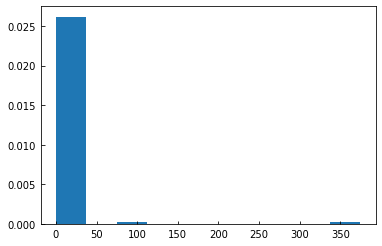

In [3]:
a = 1
a_Cons = 2
b_Cons = 1
x_min = 0.01
x_max = 5

def numInv(a, aCons, bCons, xmin, xmax):
    xtr = np.arange(xmin,xmax,0.01)
    ytr = a*(xtr**(-aCons))*np.exp(-xtr/bCons)
    
    a, b, c, d = cubic_spline_coefficients(xtr, ytr)
    
    kt = np.linspace(0, xmax,100)
    spline_int, derivs = my_cubic_spline(kt, xtr, a, b, c, d)
    return spline_int
    #generate coefficients for interpolated function
    #polyOrder = 10
    #a = np.polyfit(yApprox, xApprox,polyOrder) 
    #p = np.poly1d(a) #poly1d object
    
    #xSample = np.arange(xmin,xmax,0.001)
    #ySample = p(xSample)
    #print(np.shape(ySample))
    #sample from interpolated function
    #return ySample

y = numInv(a, a_Cons, b_Cons,x_min, x_max)
plt.hist(y,density=True)



### Exercise 3: implementing and testing a Differential Evolution algorithm (25 points + 10 extra-credit points)

**Background.** Minimization in many dimensions is generally a complicated task. However, a class of <a href="https://en.wikipedia.org/wiki/Differential_evolution">Differential Evolution</a> (DE) algorithms developed from the initial ideas of R. Storn and K. Price in 1997 (<a href="https://link.springer.com/article/10.1023%2FA%3A1008202821328">Storn & Price 1997</a>), are relatively simple to implement, work in arbitrary number of dimensions, do not require function derivatives, allow imposing bounds on the domain, and are quite efficient in minimizing multi-dimensional functions.

### What you are learning in this exercise:

* how to implement a general multi-dimensional minimization DE algorithm
* how to apply techniques you learn in the exercise 1 above in practice. 

**Task 3a. (20 points)** Use pseudo-code of the DE algorithm in exercise 1 to implement DE minimization routine with the following interface (15 points):
        
Try to "vectorize" as much of the algorithm as possible.
        
Assuming that we are searching for a minimum within some rectangular domain defined by the minimum and maximum values along each coordinate axis: $\mathbf{x}_{\rm min}$ and $\mathbf{x}_{\rm max}$, we can initialize the population members as 

$$\mathbf{x}_0 = \mathbf{x}_{\rm min} + (\mathbf{x}_{\rm max}-\mathbf{x}_{\rm min}) \times \mathrm{rand}(0,1),$$

where $\mathrm{rand}(0,1)$ is a random number uniformly distributed from 0 to 1, generated using <tt>np.random.uniform</tt>.  

Test your implementation in 2D and 5D using the Rosenbrock function similarly how optimization routines were tested in the <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook and present results of your tests along with your implementation (2 points). 

Experiment with the size of the population and values of the parameter $s$ timing how long it takes your function to find the minimum. Are the results robust to population size and $s$? Briefly describe results of your findings (3 points). If you do not succeed implementing routine fully, you can still do this part of the task using routine <tt>scipy.optimize.differential_evolution</tt>, as illustrated in the <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook.

In [34]:
def sqr(*args):
    a = args[0][0]
    b = args[0][1]
    return a**2 + b

def minimize_by_de(func, x0, atol=1.e-6, s=1.0, sigs=0.1, bounds=None):
    """
    Parameters:
    ------------
    func - Python function object
            function to minimize, should expect x0 as a parameter vector
    x0   - vector of real numbers of shape (npop, nd), 
                where npop is population size and nd is the number of func parameters
    atol - real absolute tolerance threshold for change of population member positions
    s    - real  mean of the scaling parameter s
    sigs - real  rms dispersion of s for drawing Gaussian random numbers center on s
    bounds - array of tuples;bounds for the minimization exploration; define the region in which to search for the minimum
    """
    #initialize population members
    npop = 10
    unifArray = np.random.rand(npop, len(bounds)) #pop
    #transpose to array of min vals, array of max vals
    xMin, xMax = np.transpose(np.asarray(bounds))
    x0 = xMin + (xMax - xMin)*unifArray #pop_denorm
    print(np.shape(x0))
    
    xnow = np.copy(x0)
    xnext = np.zeros_like(xnow)
    
    for i in range(npop):
        print(x0[i])
        print("i:",i,"  y =",func(x0[i]))
    
minimize_by_de(sqr, [2,2], bounds=[[-1,1],[0,2]])

(10, 2)
[-0.24903201  1.59881994]
i: 0   y = 1.6608368882652156
[0.32012519 0.84605673]
i: 1   y = 0.9485368638292118
[0.30312248 1.26180603]
i: 2   y = 1.3536892723988243
[0.98423551 1.04477322]
i: 3   y = 2.013492758822915
[0.2497201  0.81175608]
i: 4   y = 0.8741162134768096
[-0.51894522  1.57192539]
i: 5   y = 1.841229535814224
[0.41175327 0.94736032]
i: 6   y = 1.1169010734301583
[0.40207387 0.55949213]
i: 7   y = 0.7211555277578607
[0.35257733 0.7603629 ]
i: 8   y = 0.8846736690279214
[-0.91000432  1.96726277]
i: 9   y = 2.7953706389970447


In [43]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=5, its=10):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its): #iterations
        print("i:",i)
        for j in range(popsize): #npop
            print("j:",j)
            #create list of indices that are not equal to for i in npop
            idxs = [idx for idx in range(popsize) if idx != j]
            print(idxs)
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]
it = list(de(lambda x: x**2, bounds=[(-100, 100)]))
print(it[-1])

i: 0
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 1
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 2
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 3
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 4
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 5
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 6
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 7
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 8
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
i: 9
j: 0
[1, 2, 3, 4]
j: 1
[0, 2, 3, 4]
j: 2
[0, 1, 3, 4]
j: 3
[0, 1, 2, 4]
j: 4
[0, 1, 2, 3]
(array([-0.20629099]), array([1.65697488e-05]))


In [14]:
    def minimize_by_differential_evolution(func, x0, atol=1.e-6, s=1.0, bounds=None)
    
        npop = np.size(x0)[0] # the number of population members
        fnow = func(xnow)
        xnow = np.copy(x0)
        xnext = np.zeros_like(xnow)
        #....
        while some convergence criterion is not met: 
            # xnow is a vector of coordinate vectors of the current population
            # xnext is a vector of coordinate vector of the next gen population
            for i in range(npop):
                # generate random indices  ir1, ir2, ir3 
                # where all indices are not equal to each other and not equal to i
                # s can be a constant for large npop, but it's more safe to make it a Gaussian random number
                xtry = xnow[ir3] + s * (xnow[ir1] - xnor[ir2])
                if xtry is within bounds and func(xtry) <= fnow[i]:
                    xnext[i] = xtry
                else:
                    xnext[i] = xnow[i]
                
        return xnext

def minimize_by_differential_evolution(func, x0, atol=1.e-6, s=1.0, sigs=0.1, bounds=None):
    """
    Parameters:
    ------------
    func - Python function object
            function to minimize, should expect x0 as a parameter vector
    x0   - vector of real numbers of shape (npop, nd), 
                where npop is population size and nd is the number of func parameters
    atol - real absolute tolerance threshold for change of population member positions
    s    - real  mean of the scaling parameter s
    sigs - real  rms dispersion of s for drawing Gaussian random numbers center on s
    bounds - array of tuples;bounds for the minimization exploration; define the region in which to search for the minimum
    """
    npop = np.size(x0)[0]
    xnow = np.copy(x0)
    fnow = func(xnow)
    xnext = np.zeros_like(xnow)
    while():
        for i in range(npop):
            ir1, ir2, ir3 = indices(npop)
            #add check for index not equal to i
            s = np.random.normal(0, 1, 1)[0] #draw Gaussian random number
            xtry = xnow[ir3] + s * (xnow[ir1] - xnow[ir2])
            
            
    

**Task 3b (5 points).** Use the DE routine you implemented to find the minimum of the $\chi^2$ function as a function of $\Omega_{\rm m0}$, $\Omega_\Lambda$, and $\tilde{M}_0$ that you used in hw 3. Check that results you get are similar to what you obtained in hw 3. 

If you do not succeed implementing routine fully, you can still do this part of the task using routine <tt>scipy.optimize.differential_evolution</tt>, as illustrated in the <a href="05_optimization.ipynb"><tt>05_optimization.ipynb</tt></a> notebook.

**Task 3c (extra-credit 15 points).** If you implement DE minimization routine successfully in 3a, you can parallelize it using MPI routines by parallelizing mutation and selection stages during each evolutionary iteration for subsets of the population members, similarly to the parallelization of the integration described in the extra-credit exercise in hw 1. 

Present parallelized implementation and tests showing 1) that it works identically to the unparallelized version and 2) timing showing how the execution time scales with the number of MPI processes on different number of processing cores. 